In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns

In [12]:
lst_seasons=['season_18_19_shots.csv','season_17_18_shots.csv','season_16_17_shots.csv']
ls=[pd.read_csv("..\data\produced_datasets\\"+ name,index_col=[0]) for name in lst_seasons]
ls[0]['season']=1819
ls[1]['season']=1718
ls[2]['season']=1617
shots=pd.concat(ls).reset_index(drop=True)

In [17]:
shots.to_csv('..\data\produced_datasets\\all_season_shots.csv')

In [127]:
shots['location']=[literal_eval(value) for value in shots['location']]
shots['shot.end_location']=[literal_eval(value) for value in shots['shot.end_location']]

In [128]:
luis=shots[(shots['player.id']==5246.0) & (shots['shot.type.id']==87.0)]
x=np.arange(40,121,8)
y=np.arange(0,81,8)
res_x = list(map(list, zip(x, x[1:])))
res_y = list(map(list, zip(y, y[1:])))
dic_y={res_y.index(element):element for element in res_y}
dic_x={res_x.index(element):element for element in res_x}
luis['zone_x']=[key for value in luis['location'] for key,result in dic_x.items() if (value[0]>=result[0]) & (value[0]<result[1])]
luis['zone_y']=[key for value in luis['location'] for key,result in dic_y.items() if (value[1]>=result[0]) & (value[1]<result[1])]
luis['zone'] = list(zip(luis.zone_x, luis.zone_y))
luis['to_goal']=[len(value)==3 for value in luis['shot.end_location']]
luis_made=luis[luis['to_goal']==True]
luis_made['on_goal_loc']=[[element[1],element[2]] if (element[1]>=36.0) & (element[1]<=44.0) & (element[2]<=2.67) & (element[2]>0) else 0 for element in luis_made['shot.end_location']]
luis_shots_on_goal=luis_made[luis_made['on_goal_loc']!=0]
luis_shots_on_goal['goal_x']=[element[0] for element in luis_shots_on_goal['on_goal_loc']]
luis_shots_on_goal['goal_y']=[element[1] for element in luis_shots_on_goal['on_goal_loc']]
x_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']=='Goal']['goal_x']
y_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']=='Goal']['goal_y']
x_no_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']!='Goal']['goal_x']
y_no_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']!='Goal']['goal_y']

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [129]:
luis_made

,index,minute,second,player.id,player.name,location,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,...,shot.freeze_frame,shot.outcome.id,shot.outcome.name,shot.end_location,under_pressure,zone_x,zone_y,zone,to_goal,on_goal_loc
2,1799,39,16,5246.0,Luis Alberto Suárez Díaz,"[106.0, 46.0]",87.0,Open Play,38.0,Left Foot,...,"[{'location': [94.4, 44.4], 'player': {'id': 5...",100.0,Saved,"[117.8, 42.0, 0.2]",False,8,5,"(8, 5)",True,"[42.0, 0.2]"
6,2087,46,31,5246.0,Luis Alberto Suárez Díaz,"[112.9, 28.4]",87.0,Open Play,38.0,Left Foot,...,"[{'location': [113.2, 35.7], 'player': {'id': ...",98.0,Off T,"[120.0, 35.2, 2.4]",True,9,3,"(9, 3)",True,0
8,2748,60,47,5246.0,Luis Alberto Suárez Díaz,"[106.1, 32.9]",87.0,Open Play,38.0,Left Foot,...,"[{'location': [85.4, 40.4], 'player': {'id': 7...",98.0,Off T,"[120.0, 45.8, 0.1]",False,8,4,"(8, 4)",True,0
9,2816,62,14,5246.0,Luis Alberto Suárez Díaz,"[109.8, 38.8]",87.0,Open Play,40.0,Right Foot,...,"[{'location': [99.9, 44.3], 'player': {'id': 7...",97.0,Goal,"[120.0, 36.8, 0.2]",False,8,4,"(8, 4)",True,"[36.8, 0.2]"
10,3297,73,5,5246.0,Luis Alberto Suárez Díaz,"[107.4, 49.4]",87.0,Open Play,40.0,Right Foot,...,"[{'location': [105.9, 33.5], 'player': {'id': ...",100.0,Saved,"[116.6, 42.1, 0.2]",False,8,6,"(8, 6)",True,"[42.1, 0.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,2549,60,47,5246.0,Luis Alberto Suárez Díaz,"[116.2, 34.7]",87.0,Open Play,37.0,Head,...,"[{'location': [105.0, 67.0], 'player': {'id': ...",98.0,Off T,"[120.0, 35.9, 3.8]",True,9,4,"(9, 4)",True,0
1590,1297,30,40,5246.0,Luis Alberto Suárez Díaz,"[114.4, 44.6]",87.0,Open Play,40.0,Right Foot,...,"[{'location': [108.1, 48.1], 'player': {'id': ...",97.0,Goal,"[120.0, 41.8, 0.2]",False,9,5,"(9, 5)",True,"[41.8, 0.2]"
1598,1144,26,37,5246.0,Luis Alberto Suárez Díaz,"[109.8, 41.2]",87.0,Open Play,37.0,Head,...,"[{'location': [97.2, 32.8], 'player': {'id': 6...",100.0,Saved,"[118.2, 41.3, 1.4]",False,8,5,"(8, 5)",True,"[41.3, 1.4]"
1602,1914,46,0,5246.0,Luis Alberto Suárez Díaz,"[109.5, 48.7]",87.0,Open Play,40.0,Right Foot,...,"[{'location': [100.0, 49.6], 'player': {'id': ...",97.0,Goal,"[120.0, 41.5, 0.2]",True,8,6,"(8, 6)",True,"[41.5, 0.2]"


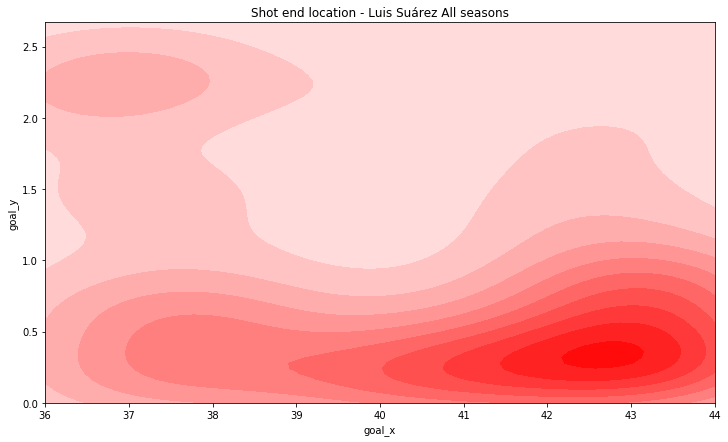

In [130]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 7)
sns.kdeplot(x_goal, y_goal, shade=True, color='red')
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.title('Shot end location - Luis Suárez All seasons')
plt.show()

In [131]:
luis_shots_on_goal['zone'].value_counts()

(8, 4)    22
(9, 5)    16
(9, 4)    15
(8, 3)    15
(8, 5)    13
(8, 6)    11
(9, 6)     7
(9, 3)     5
(7, 4)     4
(7, 5)     4
(6, 4)     3
(7, 6)     2
(7, 3)     2
(6, 6)     1
(3, 9)     1
Name: zone, dtype: int64

In [132]:
luis_shots_on_goal.groupby('zone')['goal_x','goal_y'].mean()

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,goal_x,goal_y
zone,,
"(3, 9)",39.900000,2.000000
"(6, 4)",39.166667,0.933333
"(6, 6)",42.600000,0.200000
"(7, 3)",42.450000,0.750000
"(7, 4)",40.325000,0.375000
"(7, 5)",42.200000,0.375000
"(7, 6)",42.550000,0.750000
"(8, 3)",39.013333,0.660000
"(8, 4)",39.477273,0.713636


In [133]:
luis_shots_on_goal

,index,minute,second,player.id,player.name,location,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,...,shot.outcome.name,shot.end_location,under_pressure,zone_x,zone_y,zone,to_goal,on_goal_loc,goal_x,goal_y
2,1799,39,16,5246.0,Luis Alberto Suárez Díaz,"[106.0, 46.0]",87.0,Open Play,38.0,Left Foot,...,Saved,"[117.8, 42.0, 0.2]",False,8,5,"(8, 5)",True,"[42.0, 0.2]",42.0,0.2
9,2816,62,14,5246.0,Luis Alberto Suárez Díaz,"[109.8, 38.8]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 36.8, 0.2]",False,8,4,"(8, 4)",True,"[36.8, 0.2]",36.8,0.2
10,3297,73,5,5246.0,Luis Alberto Suárez Díaz,"[107.4, 49.4]",87.0,Open Play,40.0,Right Foot,...,Saved,"[116.6, 42.1, 0.2]",False,8,6,"(8, 6)",True,"[42.1, 0.2]",42.1,0.2
19,1617,38,26,5246.0,Luis Alberto Suárez Díaz,"[99.9, 38.9]",87.0,Open Play,38.0,Left Foot,...,Saved,"[116.1, 42.1, 0.7]",True,7,4,"(7, 4)",True,"[42.1, 0.7]",42.1,0.7
35,3547,81,7,5246.0,Luis Alberto Suárez Díaz,"[113.6, 42.9]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 40.8, 0.2]",False,9,5,"(9, 5)",True,"[40.8, 0.2]",40.8,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2374,56,29,5246.0,Luis Alberto Suárez Díaz,"[105.6, 32.4]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 43.3, 0.6]",True,8,4,"(8, 4)",True,"[43.3, 0.6]",43.3,0.6
1590,1297,30,40,5246.0,Luis Alberto Suárez Díaz,"[114.4, 44.6]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 41.8, 0.2]",False,9,5,"(9, 5)",True,"[41.8, 0.2]",41.8,0.2
1598,1144,26,37,5246.0,Luis Alberto Suárez Díaz,"[109.8, 41.2]",87.0,Open Play,37.0,Head,...,Saved,"[118.2, 41.3, 1.4]",False,8,5,"(8, 5)",True,"[41.3, 1.4]",41.3,1.4
1602,1914,46,0,5246.0,Luis Alberto Suárez Díaz,"[109.5, 48.7]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 41.5, 0.2]",True,8,6,"(8, 6)",True,"[41.5, 0.2]",41.5,0.2


In [134]:
x=[36.0,40.0,44.1]
y=[0,1.34,2.68]
res_x = list(map(list, zip(x, x[1:])))
res_y = list(map(list, zip(y, y[1:])))
dic_y={res_y.index(element):element for element in res_y}
dic_x={res_x.index(element):element for element in res_x}
luis_shots_on_goal['goal_zone_x']=[key for value in luis_shots_on_goal['on_goal_loc'] for key,result in dic_x.items() if (value[0]>=result[0]) & (value[0]<result[1])]
luis_shots_on_goal['goal_zone_y']=[key for value in luis_shots_on_goal['on_goal_loc'] for key,result in dic_y.items() if (value[1]>=result[0]) & (value[1]<result[1])]
luis_shots_on_goal['goal_zone'] = list(zip(luis_shots_on_goal.goal_zone_x, luis_shots_on_goal.goal_zone_y))

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [135]:
luis_shots_on_goal

,index,minute,second,player.id,player.name,location,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,...,zone_x,zone_y,zone,to_goal,on_goal_loc,goal_x,goal_y,goal_zone_x,goal_zone_y,goal_zone
2,1799,39,16,5246.0,Luis Alberto Suárez Díaz,"[106.0, 46.0]",87.0,Open Play,38.0,Left Foot,...,8,5,"(8, 5)",True,"[42.0, 0.2]",42.0,0.2,1,0,"(1, 0)"
9,2816,62,14,5246.0,Luis Alberto Suárez Díaz,"[109.8, 38.8]",87.0,Open Play,40.0,Right Foot,...,8,4,"(8, 4)",True,"[36.8, 0.2]",36.8,0.2,0,0,"(0, 0)"
10,3297,73,5,5246.0,Luis Alberto Suárez Díaz,"[107.4, 49.4]",87.0,Open Play,40.0,Right Foot,...,8,6,"(8, 6)",True,"[42.1, 0.2]",42.1,0.2,1,0,"(1, 0)"
19,1617,38,26,5246.0,Luis Alberto Suárez Díaz,"[99.9, 38.9]",87.0,Open Play,38.0,Left Foot,...,7,4,"(7, 4)",True,"[42.1, 0.7]",42.1,0.7,1,0,"(1, 0)"
35,3547,81,7,5246.0,Luis Alberto Suárez Díaz,"[113.6, 42.9]",87.0,Open Play,40.0,Right Foot,...,9,5,"(9, 5)",True,"[40.8, 0.2]",40.8,0.2,1,0,"(1, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2374,56,29,5246.0,Luis Alberto Suárez Díaz,"[105.6, 32.4]",87.0,Open Play,40.0,Right Foot,...,8,4,"(8, 4)",True,"[43.3, 0.6]",43.3,0.6,1,0,"(1, 0)"
1590,1297,30,40,5246.0,Luis Alberto Suárez Díaz,"[114.4, 44.6]",87.0,Open Play,40.0,Right Foot,...,9,5,"(9, 5)",True,"[41.8, 0.2]",41.8,0.2,1,0,"(1, 0)"
1598,1144,26,37,5246.0,Luis Alberto Suárez Díaz,"[109.8, 41.2]",87.0,Open Play,37.0,Head,...,8,5,"(8, 5)",True,"[41.3, 1.4]",41.3,1.4,1,1,"(1, 1)"
1602,1914,46,0,5246.0,Luis Alberto Suárez Díaz,"[109.5, 48.7]",87.0,Open Play,40.0,Right Foot,...,8,6,"(8, 6)",True,"[41.5, 0.2]",41.5,0.2,1,0,"(1, 0)"


In [136]:
luis_shots_on_goal.describe()

,index,minute,second,player.id,shot.type.id,shot.body_part.id,shot.technique.id,shot.outcome.id,zone_x,zone_y,goal_x,goal_y,goal_zone_x,goal_zone_y
count,121.000000,121.000000,121.000000,121.0,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,2176.561983,50.297521,28.107438,5246.0,87.0,39.380165,92.975207,98.528926,8.148760,4.479339,40.202479,0.676860,0.545455,0.123967
std,1121.597209,26.547330,16.558382,0.0,0.0,1.018628,0.917086,1.466710,0.881865,1.065357,2.623022,0.582918,0.500000,0.330914
min,71.000000,1.000000,0.000000,5246.0,87.0,37.000000,89.000000,97.000000,3.000000,3.000000,36.000000,0.100000,0.000000,0.000000
25%,1144.000000,28.000000,16.000000,5246.0,87.0,38.000000,93.000000,97.000000,8.000000,4.000000,37.600000,0.200000,0.000000,0.000000
50%,2283.000000,52.000000,27.000000,5246.0,87.0,40.000000,93.000000,99.000000,8.000000,4.000000,40.500000,0.500000,1.000000,0.000000
75%,3121.000000,71.000000,39.000000,5246.0,87.0,40.000000,93.000000,100.000000,9.000000,5.000000,42.700000,0.900000,1.000000,0.000000
max,4415.000000,96.000000,59.000000,5246.0,87.0,40.000000,95.000000,100.000000,9.000000,9.000000,44.000000,2.400000,1.000000,1.000000


In [137]:
result=luis_shots_on_goal.groupby(['zone','goal_zone']).size().reset_index().rename(columns={0:'count'})

In [138]:
result=result.sort_values(by='count', ascending=False)
result

,zone,goal_zone,count
14,"(8, 4)","(0, 0)",12
31,"(9, 5)","(1, 0)",12
27,"(9, 4)","(0, 0)",9
23,"(8, 6)","(1, 0)",9
10,"(8, 3)","(0, 0)",9
16,"(8, 4)","(1, 0)",8
19,"(8, 5)","(1, 0)",7
34,"(9, 6)","(1, 0)",5
12,"(8, 3)","(1, 0)",4
28,"(9, 4)","(0, 1)",3


In [149]:
result.pivot(index='zone',columns='goal_zone',values='count')

goal_zone,"(0, 0)","(0, 1)","(1, 0)","(1, 1)"
zone,,,,
"(3, 9)",NaN,1.0,NaN,NaN
"(6, 4)",2.0,NaN,1.0,NaN
"(6, 6)",NaN,NaN,1.0,NaN
"(7, 3)",NaN,NaN,2.0,NaN
"(7, 4)",2.0,NaN,2.0,NaN
"(7, 5)",1.0,NaN,3.0,NaN
"(7, 6)",NaN,NaN,2.0,NaN
"(8, 3)",9.0,1.0,4.0,1.0
"(8, 4)",12.0,2.0,8.0,NaN


In [142]:
result

,zone,goal_zone,count
14,"(8, 4)","(0, 0)",12
31,"(9, 5)","(1, 0)",12
27,"(9, 4)","(0, 0)",9
23,"(8, 6)","(1, 0)",9
10,"(8, 3)","(0, 0)",9
16,"(8, 4)","(1, 0)",8
19,"(8, 5)","(1, 0)",7
34,"(9, 6)","(1, 0)",5
12,"(8, 3)","(1, 0)",4
28,"(9, 4)","(0, 1)",3
